In [2]:
# Load the required packages
# import pandas as pd
import numpy as np
import SpringRank as sr
# from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def compute_gamma(A, beta):
    
    # ignore some warning messages surfaced by SpringRank
    np.seterr(divide='ignore', invalid='ignore') 
    
    # compute springranks
    phi = sr.get_ranks(A)
    
    # exponentiate
    gamma = np.exp(beta * phi)
    
    # normalize
    gamma = gamma / gamma.sum()
    
    return(gamma)    

In [4]:

# construct the initial condition and container for trajectories
def initialize(n, n_rounds = 1, A0 = None):
    if A0 is None:
        A = np.ones((n, n)).astype(int)
    else:
        A = A0
    GAMMA = np.zeros((n_rounds, n))
    
    return(A, GAMMA)
    
# construct the increment to add to the current state. Either stochastic or deterministic. 
def increment(n, gamma, method = 'stochastic'):
    
    if method == 'stochastic':
        j = np.random.randint(n)           # uniformly random department gets to hire
        i = np.random.choice(n, p = gamma) # chooses from departments proportional to $\gamma$. 
        E = np.zeros((n,n))
        E[i,j] = 1
        return(E)
    
    elif method == 'deterministic': 
        G = np.tile(gamma, (n,1)).T        # G is the expectation of E above 
        return(G)
    
def simulate(n, beta, lam, n_rounds, method = 'stochastic', update_interval = 1, A0 = None, ranked = False):
    A, GAMMA = initialize(n, n_rounds, A0)
    
    for r in range(n_rounds):          
        if r % update_interval == 0:                    # update the springranks at this interval
            gamma = compute_gamma(A, beta)
        if ranked:     
            GAMMA[r,:] = gamma[np.argsort(gamma)]                              # record current gamma, SORTED
        else:
            GAMMA[r,:] = gamma
        A = lam*A + (1-lam)*increment(n, gamma, method) # update A
        
    return(GAMMA)

def rank_experiment(**kwargs):
    GAMMA = simulate(**kwargs)
    rank_means = GAMMA[np.int(GAMMA.shape[0]/2):,].mean(axis = 0)
    return(rank_means)

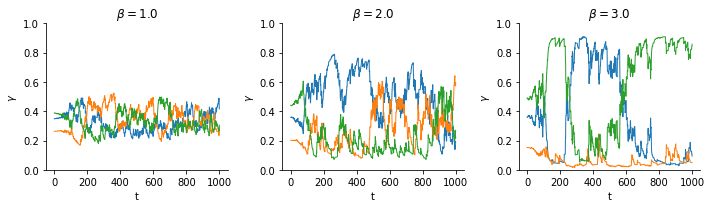

In [45]:
m_plots = 3 # this many columns of plots

betas = np.linspace(1, 3, m_plots) # evenly spaced values of $\beta$ between 1 and 3
n = 3                              # this many departments
lam = .95                          # memory param
n_rounds = 1000                    # simulation length

A0 = np.random.randint(low = 1, high = 10, size = (n,n))                # asymmetric initial condition
# A0[0,1] += 5
    
methods = ['stochastic'] # use both methods    

# create fig and axes
fig, axarr = plt.subplots(1,m_plots, figsize = (10, 3))

for i in range(m_plots):

    # do the simulation
    v = simulate(n = n, 
                 beta = betas[i], 
                 lam = lam, 
                 n_rounds = n_rounds, 
                 update_interval = 1, 
                 A0 = A0, 
                 method = 'stochastic')

    for j in range(n):
        axarr[i].plot(v[:,j], alpha = 1, linewidth = 1)

        # axis labels and aesthetics
    axarr[i].set(
                 ylim = (0,1),
                 title = r'$\beta = $' + str(betas[i]),
                 xlabel = 't',
                 ylabel = r'$\gamma$')

    axarr[i].spines['right'].set_visible(False)
    axarr[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('fig/traces.png', dpi = 300)

# Idle wondering
What would runs from realistic parameters look like in the math PhD exchange?

In [46]:
n_space = 51

order = np.zeros(n_space)

i = 0

for beta in np.linspace(1, 3, n_space):

    n = 70                              # this many department
    lam = .95                          # memory param
    n_rounds = 500                   # simulation length

    A0 = np.random.randint(low = 1, high = 10, size = (n,n))                # asymmetric initial condition

    methods = ['stochastic'] # use both methods    

    # create fig and axes

        # do the simulation
    v = simulate(n = n, 
                 beta = beta, 
                 lam = lam, 
                 n_rounds = n_rounds, 
                 update_interval = 1, 
                 A0 = A0, 
                 method = 'stochastic')
    order[i] = np.var(v[250:,], axis = 0).mean()
    i += 1
    print(beta, np.var(v[250:,], axis = 0).mean())

1.0 0.00010369151487525724
1.04 0.00011492303015656027
1.08 0.00014459176728093064
1.12 0.00017018773759431652
1.16 0.0002051364065464842
1.2 0.00022600650293641143
1.24 0.00021816702680174267
1.28 0.0001829619081511518
1.32 0.00024400077821710978
1.3599999999999999 0.000256324771458735
1.4 0.00026659785079807883
1.44 0.00022794582158339486
1.48 0.0002850728875833352
1.52 0.0003287597995573011
1.56 0.0002797428726830598
1.6 0.00029698174617104697
1.6400000000000001 0.00028179871114601267
1.6800000000000002 0.0003667534401334582
1.72 0.00044883473438827345
1.76 0.0004393246027784132
1.8 0.0002970276669252789
1.8399999999999999 0.00034273155291601954
1.88 0.0003703573411270411
1.92 0.0005057484315060215
1.96 0.0004644202033791874
2.0 0.0005753970485469384
2.04 0.0006431042180613758
2.08 0.000556000197477757
2.12 0.0008650607282215737
2.16 0.0006244258055260369
2.2 0.000578582099055392
2.24 0.0006217582057629559
2.2800000000000002 0.0006551744321607931
2.3200000000000003 0.001025753768728

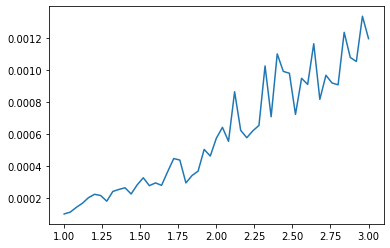

In [47]:
plt.plot(np.linspace(1,3, n_space), order)

In [35]:
order

array([0.        , 0.00022825, 0.00038514, 0.00041999, 0.00066897,
       0.00073847, 0.00089   , 0.00113393, 0.00092297, 0.001488  ,
       0.00156208])

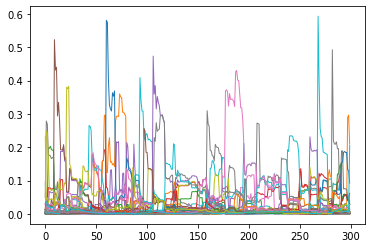

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(n):
    ax.plot(v[200:,j], alpha = 1, linewidth = 1)

0.0007916166305241768

In [30]:
def rank_experiment_suite(n, n_rounds, n_epochs, update_interval, lam, BETAS):

    R = np.zeros((n_epochs, len(BETAS), n))

    for j in range(n_epochs):
        for i in range(len(BETAS)):
            R[j,i] = rank_experiment(n = n, 
                             beta = BETAS[i], 
                             lam = lam, 
                             n_rounds = n_rounds, 
                             method = 'stochastic', 
                             update_interval = update_interval,
        #                      A0 = A0, 
                             ranked = True)
            
    return(R.mean(axis = 0))

In [35]:
R.shape

(5, 21, 3)

In [85]:
# computation for order parameter viz, may take a while

BETAS = np.linspace(1, 3, 51)
n = 3
n_rounds = 10000
n_epochs = 20
update_interval = 10
LAMBDA = [.9, 0.99, 0.995, 0.999]

R_ = {lam: rank_experiment_suite(n, n_rounds, n_epochs, update_interval, lam, BETAS) for lam in LAMBDA}

In [88]:
import pickle
with open('fig/order_parameter.pickle', 'wb') as f:
    pickle.dump(R_, f)
    
with open('fig/order_parameter.pickle', 'rb') as f:
    R_ = pickle.load(f)

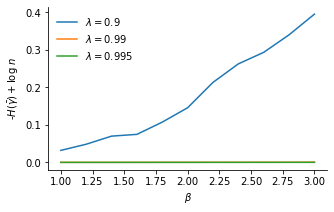

In [106]:
fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

def entropy(R):
    return((-R*np.log(R)).sum(axis = 1))

for lam in LAMBDA:
    ax.plot(BETAS, -entropy(R_[lam]) + np.log(3), label = r'$\lambda = $' + str(lam))
      
for pos in ['right', 'top']:
    ax.spines[pos].set_visible(False)

plt.legend(frameon = False)

ax.set(xlabel = r'$\beta$',
       ylabel = r'-$H(\bar{\gamma}) + \log \;n$')

plt.savefig('fig/order_parameter.png', dpi = 300)